In [1]:
from cnn.model import build_net

from spleen_dataset.dataloader import SpleenDataloader, SpleenDataset, get_training_augmentation, get_validation_augmentation
from spleen_dataset.config import dataset_folder
from spleen_dataset.utils import get_split_deterministic, get_list_of_patients

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import random
import numpy as np

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], False)
  except RuntimeError as e:
    print(e)

2022-10-07 18:52:35.018193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:52:35.086977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:52:35.087096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
patients = get_list_of_patients(dataset_folder)

In [3]:
patch_size = (128, 128)
batch_size = 32
num_classes = 2
train_augmentation = get_training_augmentation(patch_size)
val_augmentation = get_validation_augmentation(patch_size)

net_list = [ 
    'vgg_3_64',
    'vgg_3_128',
    'vgg_3_256',
    'vgg_3_512',
    'vgg_3_1024',
    'vgg_3_512',
    'vgg_3_256',
    'vgg_3_128',
    'vgg_3_64',
]


fn_dict = {
    'down_vgg_3': {'cell': 'DownscalingCell', 'block': 'VGGBlock', 'kernel': 3, 'prob': 1/3},
    'up_vgg_3': {'cell': 'UpscalingCell',   'block': 'VGGBlock', 'kernel': 3, 'prob': 1/3},
    'non_vgg_3': {'cell': 'NonscalingCell',  'block': 'VGGBlock', 'kernel': 3, 'prob': 1/3},
}

/home/guilherme/git/segqnas/.venv/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1613: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


2022-10-07 18:53:17.939997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 18:53:17.942718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:53:17.942850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 18:53:17.942936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/50


2022-10-07 18:53:24.724864: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-10-07 18:53:27.283954: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


26/26 [==============================] - 17s 294ms/step - loss: 0.9121 - gen_dice_coef: 0.0879 - val_loss: 0.8190 - val_gen_dice_coef: 0.1810 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 4s 138ms/step - loss: 0.6538 - gen_dice_coef: 0.3462 - val_loss: 0.4758 - val_gen_dice_coef: 0.5242 - lr: 9.8198e-04
Epoch 3/50
26/26 [==============================] - 4s 134ms/step - loss: 0.4581 - gen_dice_coef: 0.5419 - val_loss: 0.5808 - val_gen_dice_coef: 0.4192 - lr: 9.6393e-04
Epoch 4/50
26/26 [==============================] - 3s 133ms/step - loss: 0.4104 - gen_dice_coef: 0.5896 - val_loss: 0.2562 - val_gen_dice_coef: 0.7438 - lr: 9.4583e-04
Epoch 5/50
26/26 [==============================] - 4s 135ms/step - loss: 0.3584 - gen_dice_coef: 0.6416 - val_loss: 0.2373 - val_gen_dice_coef: 0.7627 - lr: 9.2770e-04
Epoch 6/50
26/26 [==============================] - 4s 137ms/step - loss: 0.3567 - gen_dice_coef: 0.6433 - val_loss: 0.3219 - val_gen_dice_coef: 0.6781 - lr: 9.0953e-04


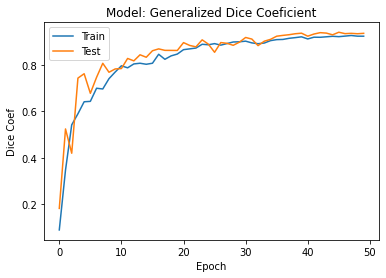

Epoch 1/50
26/26 [==============================] - 8s 228ms/step - loss: 0.9038 - gen_dice_coef: 0.0962 - val_loss: 0.7133 - val_gen_dice_coef: 0.2867 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 4s 137ms/step - loss: 0.5689 - gen_dice_coef: 0.4311 - val_loss: 0.5300 - val_gen_dice_coef: 0.4700 - lr: 9.8198e-04
Epoch 3/50
26/26 [==============================] - 3s 133ms/step - loss: 0.3795 - gen_dice_coef: 0.6205 - val_loss: 0.3593 - val_gen_dice_coef: 0.6407 - lr: 9.6393e-04
Epoch 4/50
26/26 [==============================] - 3s 133ms/step - loss: 0.3203 - gen_dice_coef: 0.6797 - val_loss: 0.2974 - val_gen_dice_coef: 0.7026 - lr: 9.4583e-04
Epoch 5/50
26/26 [==============================] - 3s 133ms/step - loss: 0.2739 - gen_dice_coef: 0.7261 - val_loss: 0.2332 - val_gen_dice_coef: 0.7668 - lr: 9.2770e-04
Epoch 6/50
26/26 [==============================] - 3s 133ms/step - loss: 0.2378 - gen_dice_coef: 0.7622 - val_loss: 0.2902 - val_gen_dice_coef: 0.7098 - lr: 9

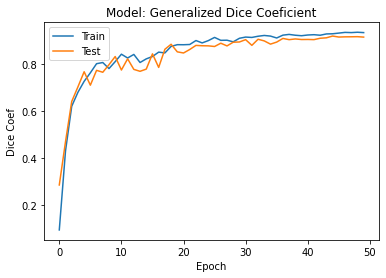

Epoch 1/50
28/28 [==============================] - 9s 261ms/step - loss: 0.9065 - gen_dice_coef: 0.0935 - val_loss: 0.7199 - val_gen_dice_coef: 0.2801 - lr: 0.0010
Epoch 2/50
28/28 [==============================] - 4s 135ms/step - loss: 0.5553 - gen_dice_coef: 0.4447 - val_loss: 0.2691 - val_gen_dice_coef: 0.7309 - lr: 9.8198e-04
Epoch 3/50
28/28 [==============================] - 4s 135ms/step - loss: 0.4018 - gen_dice_coef: 0.5982 - val_loss: 0.2597 - val_gen_dice_coef: 0.7403 - lr: 9.6393e-04
Epoch 4/50
28/28 [==============================] - 4s 135ms/step - loss: 0.3337 - gen_dice_coef: 0.6663 - val_loss: 0.1444 - val_gen_dice_coef: 0.8556 - lr: 9.4583e-04
Epoch 5/50
28/28 [==============================] - 4s 135ms/step - loss: 0.2883 - gen_dice_coef: 0.7117 - val_loss: 0.2235 - val_gen_dice_coef: 0.7765 - lr: 9.2770e-04
Epoch 6/50
28/28 [==============================] - 4s 142ms/step - loss: 0.2917 - gen_dice_coef: 0.7083 - val_loss: 0.1575 - val_gen_dice_coef: 0.8425 - lr: 9

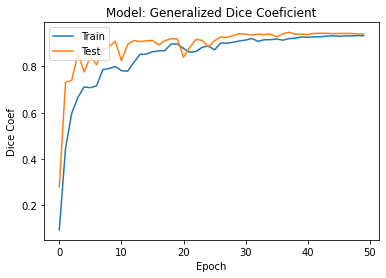

Epoch 1/50
25/25 [==============================] - 6s 167ms/step - loss: 0.8782 - gen_dice_coef: 0.1218 - val_loss: 0.5417 - val_gen_dice_coef: 0.4583 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - 4s 140ms/step - loss: 0.5698 - gen_dice_coef: 0.4302 - val_loss: 0.4703 - val_gen_dice_coef: 0.5297 - lr: 9.8198e-04
Epoch 3/50
25/25 [==============================] - 3s 138ms/step - loss: 0.4251 - gen_dice_coef: 0.5749 - val_loss: 0.2976 - val_gen_dice_coef: 0.7024 - lr: 9.6393e-04
Epoch 4/50
25/25 [==============================] - 3s 138ms/step - loss: 0.3657 - gen_dice_coef: 0.6343 - val_loss: 0.2148 - val_gen_dice_coef: 0.7852 - lr: 9.4583e-04
Epoch 5/50
25/25 [==============================] - 3s 138ms/step - loss: 0.3158 - gen_dice_coef: 0.6842 - val_loss: 0.2759 - val_gen_dice_coef: 0.7241 - lr: 9.2770e-04
Epoch 6/50
25/25 [==============================] - 4s 146ms/step - loss: 0.3000 - gen_dice_coef: 0.7000 - val_loss: 0.2511 - val_gen_dice_coef: 0.7489 - lr: 9

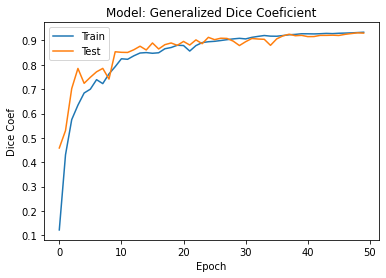

Epoch 1/50
25/25 [==============================] - 7s 202ms/step - loss: 0.8899 - gen_dice_coef: 0.1101 - val_loss: 0.7981 - val_gen_dice_coef: 0.2019 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - 4s 148ms/step - loss: 0.5936 - gen_dice_coef: 0.4064 - val_loss: 0.4674 - val_gen_dice_coef: 0.5326 - lr: 9.8198e-04
Epoch 3/50
25/25 [==============================] - 3s 137ms/step - loss: 0.4164 - gen_dice_coef: 0.5836 - val_loss: 0.3166 - val_gen_dice_coef: 0.6834 - lr: 9.6393e-04
Epoch 4/50
25/25 [==============================] - 4s 140ms/step - loss: 0.3301 - gen_dice_coef: 0.6699 - val_loss: 0.2297 - val_gen_dice_coef: 0.7703 - lr: 9.4583e-04
Epoch 5/50
25/25 [==============================] - 3s 138ms/step - loss: 0.3370 - gen_dice_coef: 0.6630 - val_loss: 0.2258 - val_gen_dice_coef: 0.7742 - lr: 9.2770e-04
Epoch 6/50
25/25 [==============================] - 3s 139ms/step - loss: 0.2822 - gen_dice_coef: 0.7178 - val_loss: 0.3351 - val_gen_dice_coef: 0.6649 - lr: 9

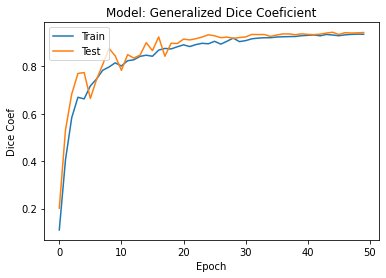

Epoch 1/50
25/25 [==============================] - 6s 160ms/step - loss: 0.8669 - gen_dice_coef: 0.1331 - val_loss: 0.6376 - val_gen_dice_coef: 0.3624 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - 4s 146ms/step - loss: 0.5046 - gen_dice_coef: 0.4954 - val_loss: 0.3192 - val_gen_dice_coef: 0.6808 - lr: 9.8198e-04
Epoch 3/50
25/25 [==============================] - 4s 143ms/step - loss: 0.4131 - gen_dice_coef: 0.5869 - val_loss: 0.3281 - val_gen_dice_coef: 0.6719 - lr: 9.6393e-04
Epoch 4/50
25/25 [==============================] - 4s 145ms/step - loss: 0.3583 - gen_dice_coef: 0.6417 - val_loss: 0.3622 - val_gen_dice_coef: 0.6378 - lr: 9.4583e-04
Epoch 5/50
25/25 [==============================] - 4s 140ms/step - loss: 0.3129 - gen_dice_coef: 0.6871 - val_loss: 0.1602 - val_gen_dice_coef: 0.8398 - lr: 9.2770e-04
Epoch 6/50
25/25 [==============================] - 4s 141ms/step - loss: 0.2443 - gen_dice_coef: 0.7557 - val_loss: 0.1978 - val_gen_dice_coef: 0.8022 - lr: 9

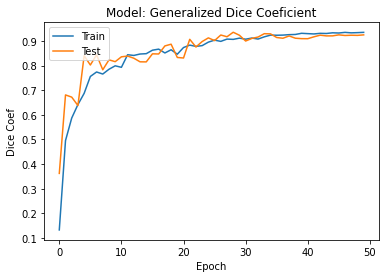

Epoch 1/50
28/28 [==============================] - 6s 154ms/step - loss: 0.9133 - gen_dice_coef: 0.0867 - val_loss: 0.8442 - val_gen_dice_coef: 0.1558 - lr: 0.0010
Epoch 2/50
28/28 [==============================] - 4s 136ms/step - loss: 0.6136 - gen_dice_coef: 0.3864 - val_loss: 0.4150 - val_gen_dice_coef: 0.5850 - lr: 9.8198e-04
Epoch 3/50
28/28 [==============================] - 4s 136ms/step - loss: 0.4223 - gen_dice_coef: 0.5777 - val_loss: 0.3695 - val_gen_dice_coef: 0.6305 - lr: 9.6393e-04
Epoch 4/50
28/28 [==============================] - 4s 137ms/step - loss: 0.3864 - gen_dice_coef: 0.6136 - val_loss: 0.3162 - val_gen_dice_coef: 0.6838 - lr: 9.4583e-04
Epoch 5/50
28/28 [==============================] - 4s 136ms/step - loss: 0.3084 - gen_dice_coef: 0.6916 - val_loss: 0.2237 - val_gen_dice_coef: 0.7763 - lr: 9.2770e-04
Epoch 6/50
28/28 [==============================] - 4s 133ms/step - loss: 0.2556 - gen_dice_coef: 0.7444 - val_loss: 0.1611 - val_gen_dice_coef: 0.8389 - lr: 9

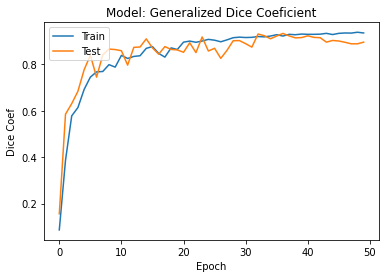

Epoch 1/50
28/28 [==============================] - 8s 221ms/step - loss: 0.8793 - gen_dice_coef: 0.1207 - val_loss: 0.7564 - val_gen_dice_coef: 0.2436 - lr: 0.0010
Epoch 2/50
28/28 [==============================] - 4s 138ms/step - loss: 0.5076 - gen_dice_coef: 0.4924 - val_loss: 0.3725 - val_gen_dice_coef: 0.6275 - lr: 9.8198e-04
Epoch 3/50
28/28 [==============================] - 4s 140ms/step - loss: 0.3736 - gen_dice_coef: 0.6264 - val_loss: 0.3788 - val_gen_dice_coef: 0.6212 - lr: 9.6393e-04
Epoch 4/50
28/28 [==============================] - 4s 140ms/step - loss: 0.3747 - gen_dice_coef: 0.6253 - val_loss: 0.2936 - val_gen_dice_coef: 0.7064 - lr: 9.4583e-04
Epoch 5/50
28/28 [==============================] - 4s 140ms/step - loss: 0.2771 - gen_dice_coef: 0.7229 - val_loss: 0.4860 - val_gen_dice_coef: 0.5140 - lr: 9.2770e-04
Epoch 6/50
28/28 [==============================] - 4s 141ms/step - loss: 0.2857 - gen_dice_coef: 0.7143 - val_loss: 0.1890 - val_gen_dice_coef: 0.8110 - lr: 9

In [4]:
val_gen_dice_coef_list = []
num_splits = 5
num_initializations = 3
epochs = 50
evaluation_epochs = int(0.2 * epochs)

for initialization in range(num_initializations):

    for fold in range(num_splits):
        train_patients, val_patients = get_split_deterministic(patients, fold=fold, num_splits=num_splits, random_state=initialization)

        train_dataset = SpleenDataset(train_patients, only_non_empty_slices=True)
        val_dataset = SpleenDataset(val_patients, only_non_empty_slices=True)

        train_dataloader = SpleenDataloader(train_dataset, batch_size, train_augmentation)
        val_dataloader = SpleenDataloader(val_dataset, batch_size, val_augmentation)

        model = build_net((*patch_size, 1), num_classes, fn_dict, net_list)

        # checkpoint_filepath = '/tmp/checkpoint'
        # model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        #     filepath=checkpoint_filepath,
        #     save_weights_only=True,
        #     monitor='val_gen_dice_coef',
        #     mode='max',
        #     save_best_only=True)

        # def learning_rate_fn(epoch, lr):
        #     return lr * 0.9

        # learning_rate_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_fn)

        def learning_rate_fn(epoch):
            initial_lr = 1e-3
            power = 0.9
            return float(initial_lr * (1 - (epoch / float(epochs))) ** power)
            
        lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_fn, verbose=False)

        history = model.fit(
            train_dataloader,
            validation_data=val_dataloader,
            epochs=epochs,
            verbose=1,
            callbacks=[
                lr_callback
                #model_checkpoint_callback,
                # learning_rate_scheduler_callback
            ]
        )
        
        # model.load_weights(checkpoint_filepath)

        print(history.history['val_gen_dice_coef'][-evaluation_epochs:])

        val_gen_dice_coef_list.extend(history.history['val_gen_dice_coef'][-evaluation_epochs:])

        # for patient in val_patients:
        #     patient_dataset = SpleenDataset([patient], only_non_empty_slices=True)
        #     patient_dataloader = SpleenDataloader(patient_dataset, 1, val_augmentation, shuffle=False)
        #     results = model.evaluate(patient_dataloader)
        #     val_gen_dice_coef_patient = results[-1]
        #     val_gen_dice_coef_list.append(val_gen_dice_coef_patient)

        #plotting the dice coef results (accuracy) as a function of the number of epochs
        plt.figure()
        plt.plot(history.history['gen_dice_coef'])
        plt.plot(history.history['val_gen_dice_coef'])
        plt.title('Model: Generalized Dice Coeficient')
        plt.ylabel('Dice Coef')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.show()

        #plotting the dice coeff results (loss function) as a function of the number of epochs
        # plt.figure()
        # plt.plot(history.history['loss'])
        # plt.plot(history.history['val_loss'])
        # plt.title('Model: Generalized Dice Coeficient')
        # plt.ylabel('Dice Loss')
        # plt.xlabel('Epoch')
        # plt.legend(['Train', 'Test'], loc='upper right')
        # plt.show()

mean_val_gen_dice_coef = (np.mean(val_gen_dice_coef_list))
std_val_gen_dice_coef = (np.std(val_gen_dice_coef_list))

print(f'Dice {mean_val_gen_dice_coef} +- {std_val_gen_dice_coef}')

In [ ]:
#!tensorboard --logdir='./logs'